# OpenFoodFact Analyze

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt


In [2]:
dataset_path = './data/'
filename = dataset_path + 'fr.openfoodfacts.org.products.csv'
data = pd.read_csv(filename, sep='\t')

/home/login/startup/server/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_columns = ['code', 'product_name', 'ingredients_text','energy_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']
df = data[df_columns].dropna(axis='rows')
df.head()

,code,product_name,ingredients_text,energy_100g,sugars_100g,proteins_100g,salt_100g
16,0000000001199,Solène céréales poulet,"antioxydant : érythorbate de sodium, colorant ...",916.0,1.7,9.7,0.464
23,0000000001663,Crème dessert chocolat,"Lait entier, sucre, amidon de maïs, cacao, Aga...",0.0,0.0,0.0,0.000
32,0000000002264,Baguette Poitevin,"baguette Poite vin Pain baguette 50,6%: farine...",866.0,0.6,8.9,0.400
41,0000000003827,Suedois saumon,"Paln suédois 42,6%: farine de BLÉ, eau, farine...",720.0,4.6,8.4,3.580
44,0000000004510,Salade shaker taboulé,"Taboulé 76,2%, légumes 12%, huile de colza, se...",477.0,1.4,3.9,0.310


In [5]:
ings_all = []
for ings in df['ingredients_text']:
    ings_arr = ings.split(', ')
    for ing in ings_arr:
        salt = ['sel', 'salt', 'Salt', 'Sel', 'sel)', 'salt)', 'sea salt']
        sugar = ['sucre', 'sugar', 'Sugar']
        water = ['eau', 'Water', 'water', 'Eau']
        if ing in salt:
            ings_all.append('Sel')
        elif ing in sugar:
            ings_all.append('Sucre')
        elif ing in water:
            ings_all.append('Eau')        
        else:
            ings_all.append(ing)

In [6]:
ings = pd.DataFrame(ings_all)
ings.columns = ['Ingredient']
ings_count = pd.DataFrame(ings.groupby('Ingredient').size()).sort_values(by=0, ascending=False)
ings_count.columns = ['Count (%)']
ings_count['Count (%)'] = round((ings_count['Count (%)'] / len(df.values))*100, 1) 

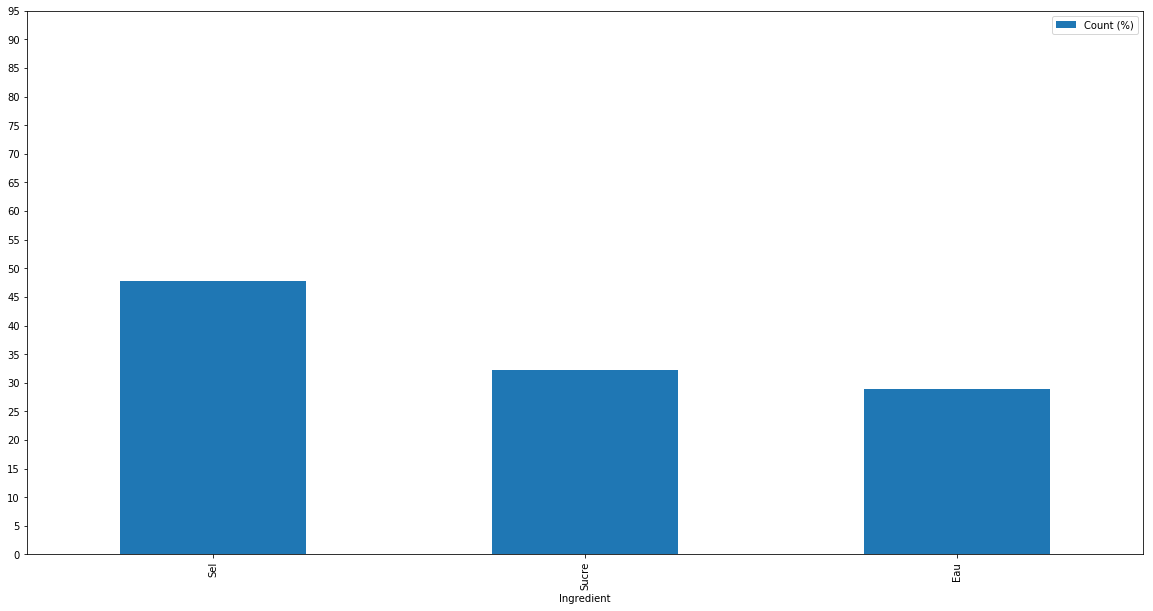

In [7]:
ings_count.reset_index().head(3).plot(kind="bar", x="Ingredient", y='Count (%)', figsize=(20, 10), yticks =np.arange(0, 100, step=5))
